<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../images/opendata-top-transblack.png" style="width:40%"></a>
</CENTER>

# A simple introduction to data analysis in ATLAS: Level 2
Now you know how to create and fill histograms from variables in a root file. **Level 2** is to select events based on what is in the event and ignore all other events. We call this **applying cuts**.

First we import ROOT to read the files in the _.root_ data format.
In order to activate the interactive visualisation of the histogram that is later created we can use the JSROOT magic activated in the second line.

In [2]:
import ROOT
## %jsroot on

Welcome to JupyROOT 6.16/00



Next we open the data file.

In [5]:
f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root")
#f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root")
print "Opened file with name ", f.GetName()

Opened file with name  http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root


After the data is opened we create the canvas on which we we draw the histogram.

In [6]:
canvas = ROOT.TCanvas("Canvas","my canvas",800,600)

The next step is to define the tree to get the data out of the _*.root_ file.

In [7]:
tree = f.Get("mini")

Now we define the first histogram. Again we start by looking at the number of leptons.

In [8]:
hist_no_lep = ROOT.TH1F("no_lep","Number of leptons",6,-0.5,5.5)

Now we loop through the events in the tree. Remember, if you want to loop through _all_ events, then _comment out_ the line that contains the word **break** in it by inserting a hash (#) at the beginning of that line.
This time we have implemented a few basic _event selections_ that select only a subset of events. These are tailored to select Z->ee or Z->mumu events. That is, we want:
1. At least 2 leptons in the event.
2. The first 2 leptons are of the same family.
3. The first 2 leptons have opposite charges.

In [9]:
print "number of total events to loop over: ", tree.GetEntries()

count = 0
for i in range(tree.GetEntries()):
    if i >= 1000000: break # use this line to test the loop: this line will make the loop run only over the first 1 million events.
    if i%1000000 == 0: print "at event number ", i # this is so we know where we are as the loop can take a while to execute.
    tree.GetEntry(i)
    count += 1
    
    #1st cut
    if tree.lep_n >= 2:
        # 2nd cut
        if tree.lep_type[0] == tree.lep_type[1]:
            #3rd cut
            if not tree.lep_charge[0] == tree.lep_charge[1]:
                #now we fill the histogram for all events that meet the 3 criteria, or "pass the cuts".
                hist_no_lep.Fill(tree.lep_n)
    
print "Done!"
print "looped over ", count, "events."

number of total events to loop over:  7500000
at event number  0
at event number  1000000
Done!
looped over  1000002 events.


After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies.

In [10]:
hist_no_lep.Draw()

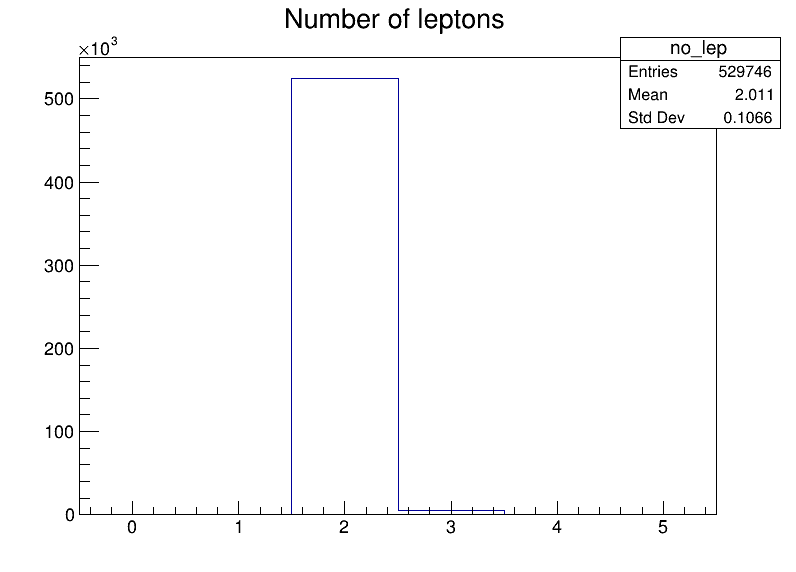

In [11]:
canvas.Draw()

Now we take the same histogram and scale the entries in each bin so that the sum of entries equal 1. This makes it easier to see how large the fraction or percentage of the occurance of a given value is. For example, if the bin with central bin value 1 has 0.45 bin entries, then we know that 45% of our events contain 1 lepton.  

In [21]:
scale = hist_no_lep.Integral()
hist_no_lep.Scale(1/scale)

In [22]:
hist_no_lep.Draw()

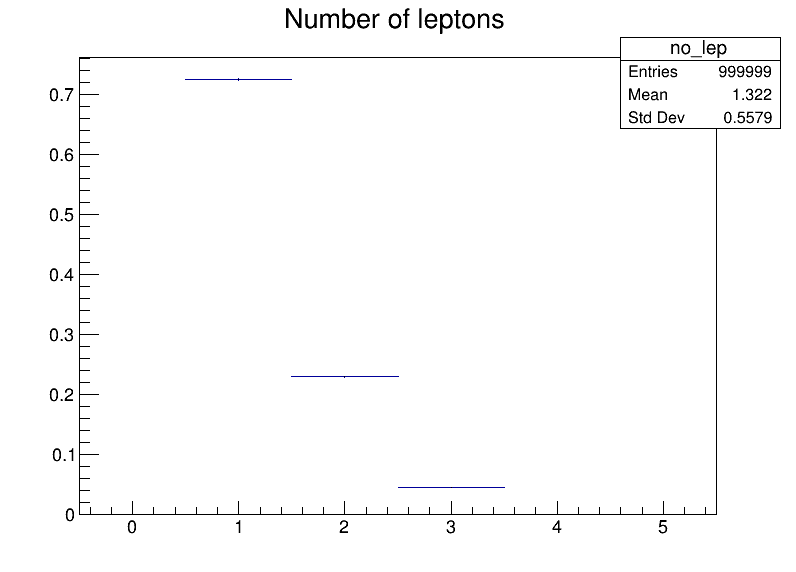

In [24]:
canvas.Draw()